Please note: this Jupyter notebook (.ipynb file) should be in the same folder as the input data file "*Copa-FSU-02172021.csv*" (in which the FLT_NUM column has commas removed).

# Importing data

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

Copa_2D = pd.read_csv('Copa-FSU-02172021.csv')

print("Copa_2D.shape =", Copa_2D.shape)

Copa_2D.shape = (54074, 92)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4,5,15,16,17,18,21,22,23,24,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data cleaning

In [2]:
valid_data_2D = Copa_2D [Copa_2D ["FLT_ACTUAL_HR"] != '?'] # Avoiding rows with missing values for flight duration.
valid_data_2D ["FLT_ACTUAL_HR"] = pd.to_numeric(valid_data_2D ["FLT_ACTUAL_HR"]) # Converting strings to numbers.

valid_data_2D = valid_data_2D [valid_data_2D ["DEP_DELAY_MINUTES"] != '?'] # Avoiding rows with missing values for departure delay.
valid_data_2D ["DEP_DELAY_MINUTES"] = pd.to_numeric(valid_data_2D ["DEP_DELAY_MINUTES"]) # Converting strings to numbers.

valid_data_2D = valid_data_2D [valid_data_2D ["ARR_DELAY_MINUTES"] != '?'] # Avoiding rows with missing values for arrival delay.
valid_data_2D ["ARR_DELAY_MINUTES"] = pd.to_numeric(valid_data_2D ["ARR_DELAY_MINUTES"]) # Converting strings to numbers.

valid_data_2D = valid_data_2D [valid_data_2D ["AIRLINE_DESIGNATOR_CD"] == "CM "] # Taking only CM rows.

# Taking only rows with origin or destination as PTY:
valid_data_2D = valid_data_2D [(valid_data_2D ["DEST_CD"] == 'PTY') | (valid_data_2D ["ORIG_CD"] == 'PTY')]

# Taking only rows with different origin and destination:
valid_data_2D = valid_data_2D [valid_data_2D ["DEST_CD"] != valid_data_2D ["ORIG_CD"]]

# Taking only rows with flight number < 1000:
valid_data_2D ["FLT_NUM"] = pd.to_numeric(valid_data_2D ["FLT_NUM"])
valid_data_2D = valid_data_2D [valid_data_2D ["FLT_NUM"] < 1000]

print("valid_data_2D.shape =", valid_data_2D.shape)

<ipython-input-2-fc8e30bc654e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_2D ["FLT_ACTUAL_HR"] = pd.to_numeric(valid_data_2D ["FLT_ACTUAL_HR"]) # Converting strings to numbers.


valid_data_2D.shape = (40065, 92)


In [3]:
banks_list_1D = ["B1", "B2", "B3", "B4", "B5", "B6", "Off Bank"]   # Banks at PTY airport.
colors_list_1D = ["r", "b", "g", "y", "c", "m", "k"]       # Number of colors >= number of banks.

# Visualizing scheduled departure times by bank

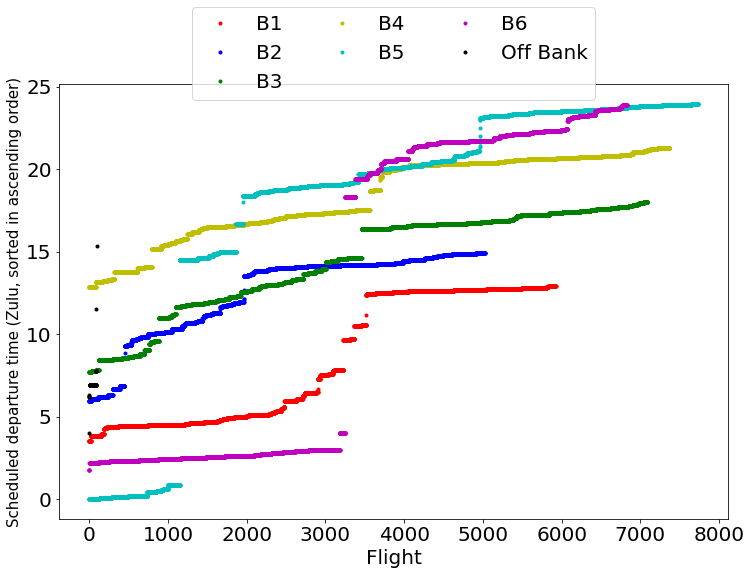

In [4]:
plt.figure(figsize = (12, 8))

for b in range(len(banks_list_1D)):
    bank_2D = valid_data_2D [valid_data_2D ["BANK OVERALL"] == banks_list_1D [b]]
    scheduled_departure_date_time_1D = bank_2D ["SCH_DEP_DTMZ"]
    # print("scheduled_departure_date_time_1D = \n", scheduled_departure_date_time_1D)

    sch_dep_hour_z_1D = scheduled_departure_date_time_1D.str.slice(-12, -10) # Getting hour.
    sch_dep_minute_z_1D = scheduled_departure_date_time_1D.str.slice(-9, -7) # Getting minute.
    sch_dep_hour_z_1D = pd.to_numeric(sch_dep_hour_z_1D)         # Converting from string to number.
    sch_dep_minute_z_1D = pd.to_numeric(sch_dep_minute_z_1D)     # Converting from string to number.
    sch_dep_minute_z_1D = sch_dep_minute_z_1D / 60               # Converting minute value to fraction between 0 and 1.
    sch_dep_time_z_1D = sch_dep_hour_z_1D + sch_dep_minute_z_1D  # Adding hour and minute values.
    # print("\n sch_dep_time_z_1D = \n", sch_dep_time_z_1D)
    
    # Sorting scheduled departure times in ascending order:
    ascend_sort_sch_dep_time_z_1D = np.sort(sch_dep_time_z_1D)
    
    string = colors_list_1D [b] + '.'
    plt.plot(ascend_sort_sch_dep_time_z_1D, string, label = banks_list_1D [b])
    plt.xlabel("Flight", fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.ylabel("Scheduled departure time (Zulu, sorted in ascending order)", fontsize = 15)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize = 20, loc = "upper center", bbox_to_anchor = (0.5, 1.2), ncol = 3)
    # plt.show()

plt.savefig("Plots - ascending sorted scheduled departure times of flights in different banks")

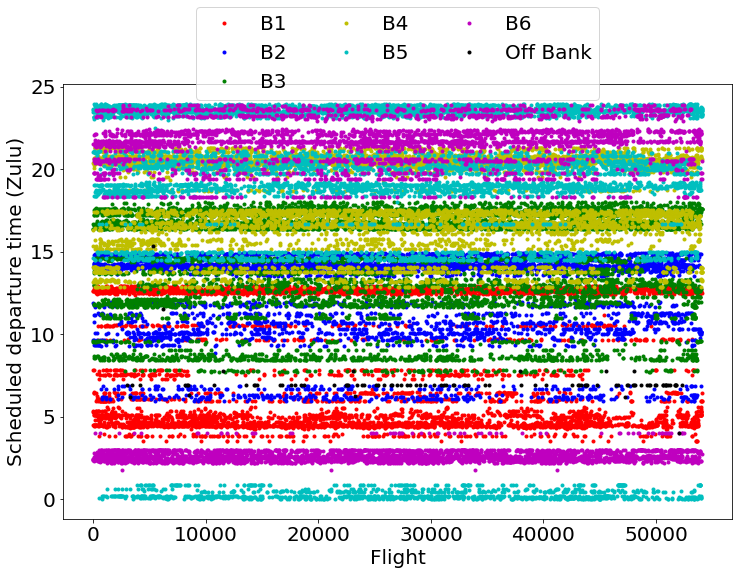

In [5]:
plt.figure(figsize = (12, 8))

for b in range(len(banks_list_1D)):
    bank_2D = valid_data_2D [valid_data_2D ["BANK OVERALL"] == banks_list_1D [b]]
    scheduled_departure_date_time_1D = bank_2D ["SCH_DEP_DTMZ"]
    # print("scheduled_departure_date_time_1D = \n", scheduled_departure_date_time_1D)

    sch_dep_hour_z_1D = scheduled_departure_date_time_1D.str.slice(-12, -10) # Getting hour.
    sch_dep_minute_z_1D = scheduled_departure_date_time_1D.str.slice(-9, -7) # Getting minute.
    sch_dep_hour_z_1D = pd.to_numeric(sch_dep_hour_z_1D)         # Converting from string to number.
    sch_dep_minute_z_1D = pd.to_numeric(sch_dep_minute_z_1D)     # Converting from string to number.
    sch_dep_minute_z_1D = sch_dep_minute_z_1D / 60               # Converting minute value to fraction between 0 and 1.
    sch_dep_time_z_1D = sch_dep_hour_z_1D + sch_dep_minute_z_1D  # Adding hour and minute values.
    # print("\n sch_dep_time_z_1D = \n", sch_dep_time_z_1D)
    
    string = colors_list_1D [b] + '.'
    plt.plot(sch_dep_time_z_1D, string, label = banks_list_1D [b])
    plt.xlabel("Flight", fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.ylabel("Scheduled departure time (Zulu)", fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize = 20, loc = "upper center", bbox_to_anchor = (0.5, 1.2), ncol = 3)
    
plt.savefig("Plots - scheduled departure times of flights in different banks")

# Visualizing scheduled arrival times by bank

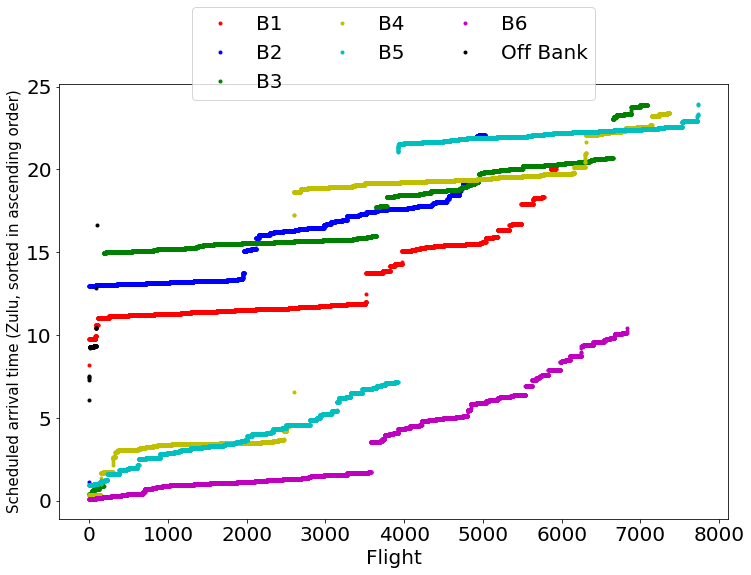

In [6]:
plt.figure(figsize = (12, 8))

for b in range(len(banks_list_1D)):
    bank_2D = valid_data_2D [valid_data_2D ["BANK OVERALL"] == banks_list_1D [b]]
    scheduled_arrival_date_time_1D = bank_2D ["SCH_ARR_DTMZ"]
    # print("scheduled_departure_date_time_1D = \n", scheduled_departure_date_time_1D)

    sch_arr_hour_z_1D = scheduled_arrival_date_time_1D.str.slice(-12, -10) # Getting hour.
    sch_arr_minute_z_1D = scheduled_arrival_date_time_1D.str.slice(-9, -7) # Getting minute.
    sch_arr_hour_z_1D = pd.to_numeric(sch_arr_hour_z_1D)         # Converting from string to number.
    sch_arr_minute_z_1D = pd.to_numeric(sch_arr_minute_z_1D)     # Converting from string to number.
    sch_arr_minute_z_1D = sch_arr_minute_z_1D / 60               # Converting minute value to fraction between 0 and 1.
    sch_arr_time_z_1D = sch_arr_hour_z_1D + sch_arr_minute_z_1D  # Adding hour and minute values.
    # print("\n sch_arr_time_z_1D = \n", sch_arr_time_z_1D)
    
    # Sorting scheduled arrival times in ascending order:
    ascend_sort_sch_arr_time_z_1D = np.sort(sch_arr_time_z_1D)
    
    string = colors_list_1D [b] + '.'
    plt.plot(ascend_sort_sch_arr_time_z_1D, string, label = banks_list_1D [b])
    plt.xlabel("Flight", fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.ylabel("Scheduled arrival time (Zulu, sorted in ascending order)", fontsize = 15)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize = 20, loc = "upper center", bbox_to_anchor = (0.5, 1.2), ncol = 3)
    # plt.show()

plt.savefig("Plots - ascending sorted scheduled arrival times of flights in different banks")

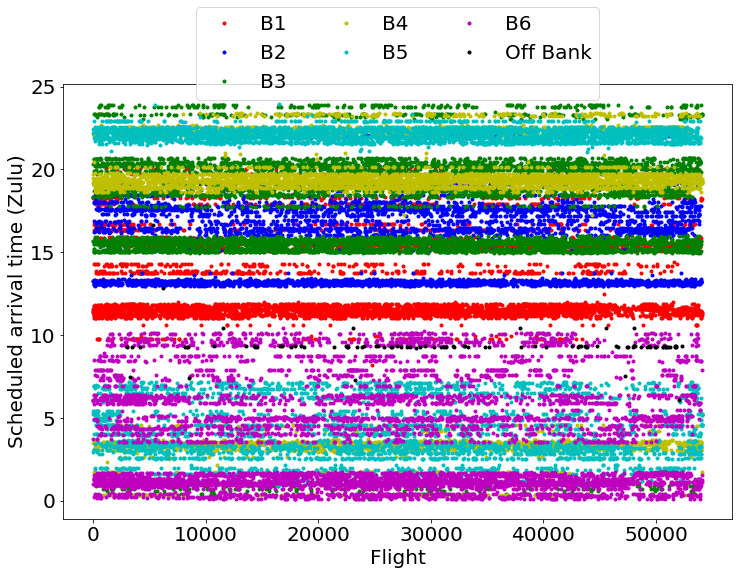

In [7]:
plt.figure(figsize = (12, 8))

for b in range(len(banks_list_1D)):
    bank_2D = valid_data_2D [valid_data_2D ["BANK OVERALL"] == banks_list_1D [b]]
    scheduled_arrival_date_time_1D = bank_2D ["SCH_ARR_DTMZ"]
    # print("scheduled_departure_date_time_1D = \n", scheduled_departure_date_time_1D)

    sch_arr_hour_z_1D = scheduled_arrival_date_time_1D.str.slice(-12, -10) # Getting hour.
    sch_arr_minute_z_1D = scheduled_arrival_date_time_1D.str.slice(-9, -7) # Getting minute.
    sch_arr_hour_z_1D = pd.to_numeric(sch_arr_hour_z_1D)         # Converting from string to number.
    sch_arr_minute_z_1D = pd.to_numeric(sch_arr_minute_z_1D)     # Converting from string to number.
    sch_arr_minute_z_1D = sch_arr_minute_z_1D / 60               # Converting minute value to fraction between 0 and 1.
    sch_arr_time_z_1D = sch_arr_hour_z_1D + sch_arr_minute_z_1D  # Adding hour and minute values.
    # print("\n sch_arr_time_z_1D = \n", sch_arr_time_z_1D)
    
    string = colors_list_1D [b] + '.'
    plt.plot(sch_arr_time_z_1D, string, label = banks_list_1D [b])
    plt.xlabel("Flight", fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.ylabel("Scheduled arrival time (Zulu)", fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.legend(fontsize = 20, loc = "upper center", bbox_to_anchor = (0.5, 1.2), ncol = 3)
    # plt.show()

plt.savefig("Plots - scheduled arrival times of flights in different banks")